In [109]:
print("Installing imagehash...")
!{sys.executable} -m pip -q install "imagehash"

Installing imagehash...


In [110]:
import sys
import glob
import os
from functools import partial

import imagehash
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import display, HTML

In [111]:
monet_paths = glob.glob('../data/Art/Monet/*.png')
vangogh_paths = glob.glob('../data/Art/VanGogh/*.png')

In [112]:
monet_images = [Image.open(path) for path in monet_paths]
vangogh_images = [Image.open(path) for path in vangogh_paths]

#### Monet Images

/glade/scratch/bpetzke/ipykernel_69255/574620190.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


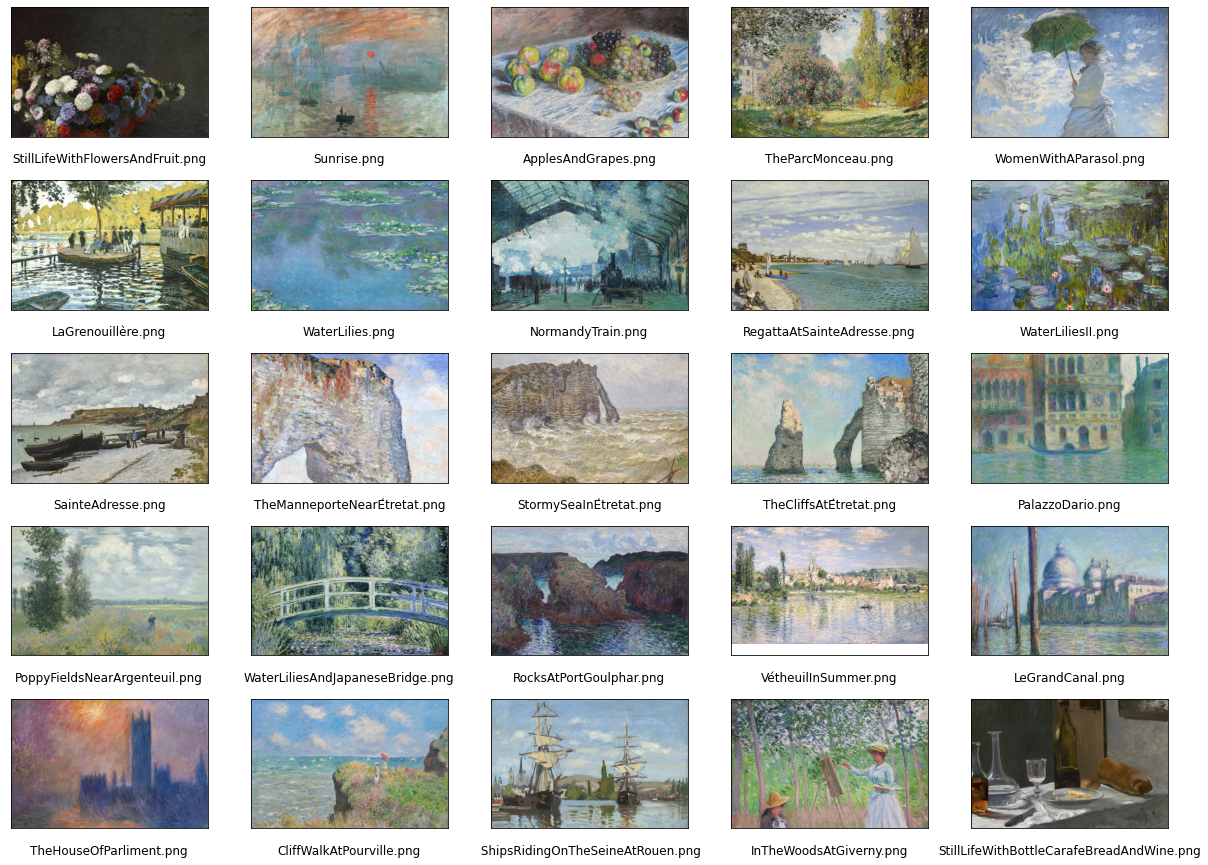

In [113]:
fig = plt.figure(figsize=(20, 12))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(5, 5),
                 axes_pad=0.6,
                 share_all = True
                 )

for i, (ax, im) in enumerate(zip(grid, monet_images)):
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(os.path.basename(monet_paths[i]),y=-.25)

plt.tight_layout()
plt.show()

#### van Gogh Images

/glade/scratch/bpetzke/ipykernel_69255/510999627.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


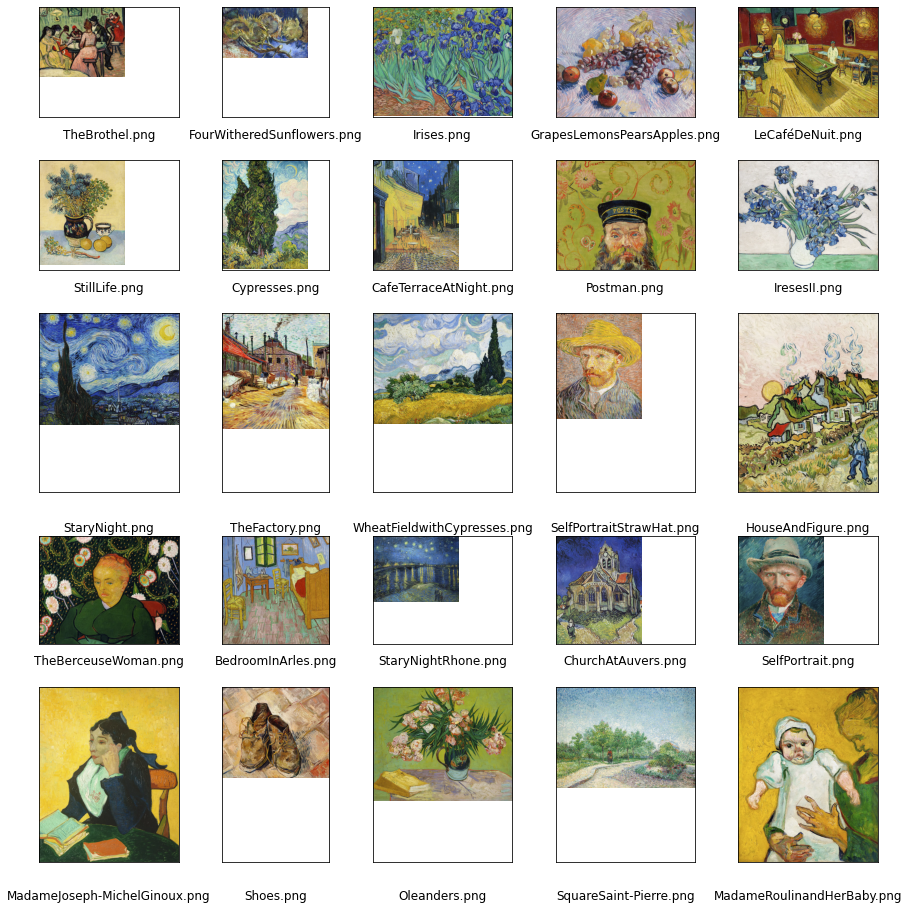

In [114]:
fig = plt.figure(figsize=(12,20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(5, 5),
                 axes_pad=0.6,
                 #share_all = True
                 )

for i, (ax, im) in enumerate(zip(grid, vangogh_images)):
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(os.path.basename(vangogh_paths[i]),y=-.25)

plt.tight_layout()
plt.show()

#### Monet Image Hashes

In [115]:
df_monet_hash = pd.DataFrame(columns=['image_name','ahash','phash','phash_simple','dhash','whash','colorhash','crop_resistant_hash'])

for i,(path,img) in enumerate(zip(monet_paths,monet_images)):
    row = {
        'image_name': os.path.basename(path),
        'ahash': imagehash.average_hash(img),
        'phash': imagehash.phash(img),
        'phash_simple': imagehash.phash_simple(img),
        'dhash': imagehash.dhash(img),
        'whash': imagehash.whash(img),
        'colorhash': imagehash.colorhash(img),  
        'crop_resistant_hash': imagehash.crop_resistant_hash(img)
    }
    
    df_monet_hash.loc[i] = row

df_monet_hash

,image_name,ahash,phash,phash_simple,dhash,whash,colorhash,crop_resistant_hash
0,StillLifeWithFlowersAndFruit.png,0000f0e000e0df3f,b2649e780cf3cf14,3f3f3f3f60c0ccff,bea5c4ce97191d7d,0040f4e040efffbf,0fc00008000,"59f8ca8e0c8c8891,9776ac8460c2c089,b3caea7bf3cb..."
1,Sunrise.png,e7efdf8091c7c303,bcd1b3b04c73949c,e8e0e04260f07271,0e1f1453370f0f67,c7efd70091c7c303,07e00000000,"0e1f1453370f0f67,dc1a1b0f597d7d7f,98b839398787..."
2,ApplesAndGrapes.png,c080e001ff7f1fff,e66659c9e51ac2f0,80c08880a8e948cc,0004cda586e0798e,8000c001ff7f1fff,06641000000,"0004cda586e0798e,94800cc99999cb4e,9f4f638fa765..."
3,TheParcMonceau.png,0e1efcccc6ce1c00,91d30fb66749d468,2b2327262f3723b3,d8d8d0989cbcb1bc,0e5efccccece1c02,06c80000000,"d8d8f09098989cb8,3c3c65cdc99b2f68,e7b35677ebbb..."
4,WomenWithAParasol.png,00e7fffff7c30000,e4c433331c4bde8e,99cf636163e3c988,9e86e4e7a68f0d19,00e7fff7f7c30000,062c2000000,"8e9ee6e4c7a68f0d,26ce9e9e9e86e4e6,8e8f0d0d4d19..."
5,LaGrenouillère.png,6efcfee4c4e0b424,d2a1037333a7a53e,676766a7a6a696a0,dcc8a48c1cc86c68,6efcfee4c4e02424,07e40000000,"dcc8a48c1cc86c68,9baca6e7c5f5d1cd,5b6d4d072f3e..."
6,WaterLilies.png,fc1f6fefffde0000,92db0cdcebe3500d,db928cbd302e2c3a,2038c9cd733074d7,fc0e6cefff1e0000,02007000000,"283cd65399dc7616,9dc1e412b1254626,3a3acdc94d73..."
7,NormandyTrain.png,740e3cfcf81000ec,c493316cf8cb0ee6,8c88a9aba7272b2e,84fce0c08567e398,741e3cfcf81030fc,07017000000,"d2cef670c05081a3,f88220687860f1e8,d8f2e9d1819b..."
8,RegattaAtSainteAdresse.png,fffefe7f00006060,c0bee7208ea17e17,8b808cbfa3abafb6,c0401cf0f882c0c0,fffefe7f00002060,07c10000000,"c0401cf0f882c0c0,1a9b5e2607b7e4e6,bd694fd79272..."
9,WaterLiliesII.png,fefcf8fcc8400000,d0ded6a0918e766c,adada8a8a8a685a5,e4c060f0918ee9dc,fefcfcfccc420004,06283000000,"f2f05450fc88d1c6,eca8b83692cca080,8039e0c3d1a1..."


#### van Gogh Hashes

In [116]:
df_vangogh_hash = pd.DataFrame(columns=['image_name','ahash','phash','phash_simple','dhash','whash','colorhash','crop_resistant_hash'])

for i,(path,img) in enumerate(zip(vangogh_paths,vangogh_images)):
    row = {
        'image_name': os.path.basename(path),
        'ahash': imagehash.average_hash(img),
        'phash': imagehash.phash(img),
        'phash_simple': imagehash.phash_simple(img),
        'dhash': imagehash.dhash(img),
        'whash': imagehash.whash(img),
        'colorhash': imagehash.colorhash(img),  
        'crop_resistant_hash': imagehash.crop_resistant_hash(img)
    }
    
    df_vangogh_hash.loc[i] = row

df_vangogh_hash

,image_name,ahash,phash,phash_simple,dhash,whash,colorhash,crop_resistant_hash
0,TheBrothel.png,eef00068c8c8f1f9,c917e4b9f121193e,e2e2c2a68199898c,9aa473db39938383,eef000e8d8c8f1f9,0ae40008000,"3432b66449434924,4763c392d03c2ee3,acacae5293b1..."
1,FourWitheredSunflowers.png,01097ece6e04c7e3,b10b6b0a6db44fe4,5257575612161707,53dbecbed24c8c8e,01097e4e7ea4c7e3,03603000000,"934968ccac2a4c4a,4ea6e5d2f8fc9c9d,b4cd6733335b..."
2,Irises.png,de505191ffec74f0,ea9847b3bd1293a4,39b7e7d9ab9cd5d1,38a1a9b517c9c563,de504111f7ec74f0,01251000000,"a969e9c9d95bc92c,25a5928ecbd5d3e1,b632716b6b2d..."
3,GrapesLemonsPearsApples.png,fefee3810101cfff,a8e7d10a27794795,8eababa980a9c9c9,c4840707a7a9119c,fef2e0810001cfff,06601008000,"c4840707a7a9119c,230333d3d6b2189b,9339291a1613..."
4,LeCaféDeNuit.png,0009303c66f2f7ff,8559b8759a9e5664,b0b072335252d3d3,b293e46c4c46a6e4,00493034e2f2f7ff,00400018000,"f0f1c8d9ecbab39a,7130e08c27c4cccc,86e8d894cc46..."
5,StillLife.png,ff878183c7c1a1ff,b3bc8ed0c04e69cb,00036370606e7e5c,9c2f0f0e9f9f4d4f,ff838183c7c001ff,03c00000000,"9c2f0f0e9f9f4d4f,2e670f07079e9c8e,1370d8703336..."
6,Cypresses.png,cfc7870707074419,b6b3c1518f615e58,e2e262626464646c,980d2c6c6c2d9d73,cfc787878707c419,06281000000,"f4a6e7c306291929,9a1d6c6c2c2d9973,e7a519315d59..."
7,CafeTerraceAtNight.png,b0c07878707f3f7f,c15fb6b74c85d301,8a898fa9b1f9e1e0,4414c3d3c3c8c697,20c07070707f3f7f,03c02000000,"4414c3d3c3c8c697,74908a8aa2939d7d,ccc6e2d0b038..."
8,Postman.png,ffffc3fffbc38000,ec9553adc56a2076,a6af87b238383a66,789c17369607098c,ffcfc3fbc3c10000,08c00008000,"589c1716b6860b49,f1b32333b08ccc84,1e1736b6860b..."
9,IresesII.png,dfdf200101e3f798,ae9bd0e0198763c7,2a2b71717171717e,b6bc4d672787a4b1,dfdf000101e3f7d8,06006000000,"b6bc4d672787a4b1,436b3b3331271313,1a189c9a4327..."


### Max Hash Lengths

In [159]:
vangogh_hash_lens = df_vangogh_hash.applymap(lambda x: len(str(x))).max()[1:]
vangogh_hash_lens

ahash                   16
phash                   16
phash_simple            16
dhash                   16
whash                   16
colorhash               11
crop_resistant_hash    220
dtype: int64

In [160]:
monet_hash_lens = df_monet_hash.applymap(lambda x: len(str(x))).max()[1:]
monet_hash_lens

ahash                   16
phash                   16
phash_simple            16
dhash                   16
whash                   16
colorhash               11
crop_resistant_hash    186
dtype: int64

### Monet Hamming Distances

In [117]:
def hamming(hash1, hash2):
    return sum(c1 != c2 for c1,c2 in zip(str(hash1),str(hash2)))

In [120]:
monet_dist_dfs = {}
for _,row in df_monet_hash.iterrows():
    hamming_series = df_monet_hash.apply(lambda curr_row: [hamming(row[j],curr_row[j]) for j in range(1,len(curr_row))], axis=1)
    hamming_df = pd.DataFrame.from_records(hamming_series, columns=[f'{col}_ham_dist' for col in df_monet_hash.columns[1:]])
    hamming_df.insert(0, 'image_name', df_monet_hash['image_name'])
    monet_dist_dfs[row['image_name']] = hamming_df

In [121]:
for img_name, hamming_df in monet_dist_dfs.items():
    print(f'---- {img_name} ----')
    print(display(hamming_df))

---- StillLifeWithFlowersAndFruit.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,0,0,0,0,0,0,0
1,Sunrise.png,15,13,13,13,15,3,63
2,ApplesAndGrapes.png,11,14,16,15,11,5,75
3,TheParcMonceau.png,14,16,16,15,14,3,76
4,WomenWithAParasol.png,13,14,13,13,13,5,46
5,LaGrenouillère.png,12,14,16,15,13,4,72
6,WaterLilies.png,15,14,14,14,15,4,76
7,NormandyTrain.png,14,16,16,15,16,5,76
8,RegattaAtSainteAdresse.png,12,15,15,16,14,3,76
9,WaterLiliesII.png,14,16,16,15,15,5,53


None
---- Sunrise.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,15,13,13,13,15,3,63
1,Sunrise.png,0,0,0,0,0,0,0
2,ApplesAndGrapes.png,16,16,15,15,15,4,60
3,TheParcMonceau.png,14,13,16,16,14,3,60
4,WomenWithAParasol.png,12,14,15,12,13,4,45
5,LaGrenouillère.png,16,14,16,14,16,1,61
6,WaterLilies.png,13,14,15,15,15,3,59
7,NormandyTrain.png,16,16,16,16,16,3,60
8,RegattaAtSainteAdresse.png,16,15,15,15,16,2,62
9,WaterLiliesII.png,15,13,16,16,15,4,59


None
---- ApplesAndGrapes.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,11,14,16,15,11,5,75
1,Sunrise.png,16,16,15,15,15,4,60
2,ApplesAndGrapes.png,0,0,0,0,0,0,0
3,TheParcMonceau.png,15,16,16,16,15,3,73
4,WomenWithAParasol.png,14,15,14,15,14,3,46
5,LaGrenouillère.png,16,16,15,16,16,3,106
6,WaterLilies.png,14,15,15,12,13,4,107
7,NormandyTrain.png,15,16,14,15,14,4,106
8,RegattaAtSainteAdresse.png,16,16,12,15,16,4,76
9,WaterLiliesII.png,16,16,13,15,16,3,63


None
---- TheParcMonceau.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,16,16,15,14,3,76
1,Sunrise.png,14,13,16,16,14,3,60
2,ApplesAndGrapes.png,15,16,16,16,15,3,73
3,TheParcMonceau.png,0,0,0,0,0,0,0
4,WomenWithAParasol.png,11,14,16,16,12,3,48
5,LaGrenouillère.png,13,15,16,13,13,3,70
6,WaterLilies.png,12,13,14,15,12,4,75
7,NormandyTrain.png,13,15,14,15,13,4,72
8,RegattaAtSainteAdresse.png,13,16,14,16,14,2,75
9,WaterLiliesII.png,10,14,16,13,10,2,60


None
---- WomenWithAParasol.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,13,14,13,13,13,5,46
1,Sunrise.png,12,14,15,12,13,4,45
2,ApplesAndGrapes.png,14,15,14,15,14,3,46
3,TheParcMonceau.png,11,14,16,16,12,3,48
4,WomenWithAParasol.png,0,0,0,0,0,0,0
5,LaGrenouillère.png,15,13,15,15,15,4,46
6,WaterLilies.png,9,16,16,16,11,4,42
7,NormandyTrain.png,12,12,16,15,13,4,42
8,RegattaAtSainteAdresse.png,12,15,15,15,13,4,43
9,WaterLiliesII.png,10,16,16,15,11,2,46


None
---- LaGrenouillère.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,12,14,16,15,13,4,72
1,Sunrise.png,16,14,16,14,16,1,61
2,ApplesAndGrapes.png,16,16,15,16,16,3,106
3,TheParcMonceau.png,13,15,16,13,13,3,70
4,WomenWithAParasol.png,15,13,15,15,15,4,46
5,LaGrenouillère.png,0,0,0,0,0,0,0
6,WaterLilies.png,15,14,16,15,15,4,118
7,NormandyTrain.png,15,16,14,15,15,3,107
8,RegattaAtSainteAdresse.png,12,15,14,16,11,2,74
9,WaterLiliesII.png,10,15,11,15,10,4,58


None
---- WaterLilies.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,15,14,14,14,15,4,76
1,Sunrise.png,13,14,15,15,15,3,59
2,ApplesAndGrapes.png,14,15,15,12,13,4,107
3,TheParcMonceau.png,12,13,14,15,12,4,75
4,WomenWithAParasol.png,9,16,16,16,11,4,42
5,LaGrenouillère.png,15,14,16,15,15,4,118
6,WaterLilies.png,0,0,0,0,0,0,0
7,NormandyTrain.png,13,15,14,15,11,2,108
8,RegattaAtSainteAdresse.png,12,16,12,15,11,4,73
9,WaterLiliesII.png,11,15,16,15,11,4,60


None
---- NormandyTrain.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,16,16,15,16,5,76
1,Sunrise.png,16,16,16,16,16,3,60
2,ApplesAndGrapes.png,15,16,14,15,14,4,106
3,TheParcMonceau.png,13,15,14,15,13,4,72
4,WomenWithAParasol.png,12,12,16,15,13,4,42
5,LaGrenouillère.png,15,16,14,15,15,3,107
6,WaterLilies.png,13,15,14,15,11,2,108
7,NormandyTrain.png,0,0,0,0,0,0,0
8,RegattaAtSainteAdresse.png,13,14,13,15,13,2,76
9,WaterLiliesII.png,10,16,13,12,12,4,56


None
---- RegattaAtSainteAdresse.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,12,15,15,16,14,3,76
1,Sunrise.png,16,15,15,15,16,2,62
2,ApplesAndGrapes.png,16,16,12,15,16,4,76
3,TheParcMonceau.png,13,16,14,16,14,2,75
4,WomenWithAParasol.png,12,15,15,15,13,4,43
5,LaGrenouillère.png,12,15,14,16,11,2,74
6,WaterLilies.png,12,16,12,15,11,4,73
7,NormandyTrain.png,13,14,13,15,13,2,76
8,RegattaAtSainteAdresse.png,0,0,0,0,0,0,0
9,WaterLiliesII.png,10,12,14,12,12,4,54


None
---- WaterLiliesII.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,16,16,15,15,5,53
1,Sunrise.png,15,13,16,16,15,4,59
2,ApplesAndGrapes.png,16,16,13,15,16,3,63
3,TheParcMonceau.png,10,14,16,13,10,2,60
4,WomenWithAParasol.png,10,16,16,15,11,2,46
5,LaGrenouillère.png,10,15,11,15,10,4,58
6,WaterLilies.png,11,15,16,15,11,4,60
7,NormandyTrain.png,10,16,13,12,12,4,56
8,RegattaAtSainteAdresse.png,10,12,14,12,12,4,54
9,WaterLiliesII.png,0,0,0,0,0,0,0


None
---- SainteAdresse.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,11,16,15,15,13,3,45
1,Sunrise.png,13,15,16,16,14,0,42
2,ApplesAndGrapes.png,14,16,16,15,14,4,44
3,TheParcMonceau.png,14,15,15,14,13,3,48
4,WomenWithAParasol.png,14,14,16,16,15,4,47
5,LaGrenouillère.png,12,14,14,15,13,1,47
6,WaterLilies.png,12,16,15,12,16,3,46
7,NormandyTrain.png,15,16,16,15,13,3,44
8,RegattaAtSainteAdresse.png,9,15,16,15,9,2,47
9,WaterLiliesII.png,12,14,14,15,15,4,45


None
---- TheManneporteNearÉtretat.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,15,15,16,14,15,4,57
1,Sunrise.png,10,14,13,13,12,2,60
2,ApplesAndGrapes.png,15,15,15,16,15,4,58
3,TheParcMonceau.png,11,15,16,13,12,4,54
4,WomenWithAParasol.png,8,16,12,13,8,4,44
5,LaGrenouillère.png,15,15,14,16,15,3,62
6,WaterLilies.png,9,15,16,16,11,3,61
7,NormandyTrain.png,15,15,15,16,15,3,57
8,RegattaAtSainteAdresse.png,13,14,15,13,12,3,57
9,WaterLiliesII.png,12,14,16,14,12,4,57


None
---- StormySeaInÉtretat.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,15,15,12,16,16,3,71
1,Sunrise.png,14,15,15,16,12,1,61
2,ApplesAndGrapes.png,13,14,15,14,11,3,89
3,TheParcMonceau.png,12,14,15,13,14,2,75
4,WomenWithAParasol.png,11,16,14,16,12,3,43
5,LaGrenouillère.png,16,15,14,14,16,2,79
6,WaterLilies.png,7,13,16,15,8,3,89
7,NormandyTrain.png,13,14,15,15,15,4,94
8,RegattaAtSainteAdresse.png,12,15,16,15,13,3,73
9,WaterLiliesII.png,12,15,15,14,14,3,62


None
---- TheCliffsAtÉtretat.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,13,15,14,16,14,4,78
1,Sunrise.png,16,13,13,16,16,2,59
2,ApplesAndGrapes.png,15,16,14,15,16,4,74
3,TheParcMonceau.png,14,15,15,14,15,4,76
4,WomenWithAParasol.png,13,14,15,16,13,3,46
5,LaGrenouillère.png,13,14,15,16,12,3,76
6,WaterLilies.png,13,15,15,15,13,2,73
7,NormandyTrain.png,13,14,12,16,13,2,74
8,RegattaAtSainteAdresse.png,10,16,14,14,10,3,74
9,WaterLiliesII.png,9,15,14,14,10,3,59


None
---- PalazzoDario.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,13,14,15,15,13,5,80
1,Sunrise.png,16,15,15,15,15,4,59
2,ApplesAndGrapes.png,12,16,16,15,14,3,73
3,TheParcMonceau.png,15,14,16,14,15,3,77
4,WomenWithAParasol.png,16,15,12,14,16,3,46
5,LaGrenouillère.png,15,14,14,16,15,4,77
6,WaterLilies.png,16,14,16,16,15,3,74
7,NormandyTrain.png,14,16,15,14,15,2,75
8,RegattaAtSainteAdresse.png,15,15,14,15,15,3,74
9,WaterLiliesII.png,15,15,15,14,15,3,62


None
---- PoppyFieldsNearArgenteuil.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,16,11,15,16,4,72
1,Sunrise.png,13,16,16,15,14,2,59
2,ApplesAndGrapes.png,15,15,16,14,15,4,89
3,TheParcMonceau.png,14,15,14,16,15,2,77
4,WomenWithAParasol.png,10,15,14,15,10,4,40
5,LaGrenouillère.png,15,15,16,15,16,2,86
6,WaterLilies.png,8,13,14,15,10,4,88
7,NormandyTrain.png,13,15,16,15,15,3,81
8,RegattaAtSainteAdresse.png,9,15,15,14,10,2,71
9,WaterLiliesII.png,11,16,16,15,13,3,59


None
---- WaterLiliesAndJapaneseBridge.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,15,15,15,15,16,5,72
1,Sunrise.png,15,15,15,16,13,3,62
2,ApplesAndGrapes.png,15,16,15,16,15,4,104
3,TheParcMonceau.png,9,15,14,15,11,4,74
4,WomenWithAParasol.png,12,12,13,15,14,4,46
5,LaGrenouillère.png,15,14,13,13,16,3,118
6,WaterLilies.png,11,16,13,15,11,3,149
7,NormandyTrain.png,15,14,14,11,14,2,107
8,RegattaAtSainteAdresse.png,12,12,16,16,13,3,74
9,WaterLiliesII.png,12,14,15,15,13,3,56


None
---- RocksAtPortGoulphar.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,10,15,14,16,14,4,61
1,Sunrise.png,15,12,15,14,15,3,63
2,ApplesAndGrapes.png,13,16,14,16,14,3,60
3,TheParcMonceau.png,16,12,15,13,15,3,56
4,WomenWithAParasol.png,16,16,16,16,16,3,47
5,LaGrenouillère.png,13,14,15,15,15,4,60
6,WaterLilies.png,15,13,16,15,14,1,58
7,NormandyTrain.png,15,16,16,16,15,2,55
8,RegattaAtSainteAdresse.png,7,15,16,14,10,4,63
9,WaterLiliesII.png,12,12,15,14,14,3,58


None
---- VétheuilInSummer.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,15,14,16,15,4,30
1,Sunrise.png,15,16,16,16,15,2,32
2,ApplesAndGrapes.png,15,15,15,16,15,4,32
3,TheParcMonceau.png,15,16,14,15,15,2,26
4,WomenWithAParasol.png,15,15,14,15,16,4,31
5,LaGrenouillère.png,15,15,15,13,14,2,26
6,WaterLilies.png,12,15,16,15,14,4,30
7,NormandyTrain.png,16,16,13,14,13,3,29
8,RegattaAtSainteAdresse.png,13,16,14,12,12,2,28
9,WaterLiliesII.png,14,16,11,14,14,3,28


None
---- LeGrandCanal.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,14,12,13,15,4,75
1,Sunrise.png,12,14,14,16,14,2,64
2,ApplesAndGrapes.png,16,16,16,16,15,4,95
3,TheParcMonceau.png,14,13,13,9,12,4,72
4,WomenWithAParasol.png,14,14,13,16,14,4,47
5,LaGrenouillère.png,16,12,16,13,16,3,93
6,WaterLilies.png,13,15,15,15,15,2,89
7,NormandyTrain.png,16,13,15,16,16,2,88
8,RegattaAtSainteAdresse.png,12,15,15,15,12,3,75
9,WaterLiliesII.png,15,16,16,15,15,4,60


None
---- TheHouseOfParliment.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,13,14,13,16,15,4,46
1,Sunrise.png,16,15,16,16,16,3,47
2,ApplesAndGrapes.png,16,16,16,15,16,2,44
3,TheParcMonceau.png,15,16,16,16,15,3,44
4,WomenWithAParasol.png,16,16,16,15,16,3,44
5,LaGrenouillère.png,14,12,15,15,14,4,43
6,WaterLilies.png,16,16,16,15,16,3,42
7,NormandyTrain.png,14,15,14,14,13,4,43
8,RegattaAtSainteAdresse.png,10,16,15,13,10,4,45
9,WaterLiliesII.png,14,14,15,14,15,2,43


None
---- CliffWalkAtPourville.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,12,16,15,16,14,5,43
1,Sunrise.png,15,16,15,15,15,3,45
2,ApplesAndGrapes.png,15,16,14,16,14,3,47
3,TheParcMonceau.png,15,15,13,12,14,4,41
4,WomenWithAParasol.png,13,12,16,16,13,3,46
5,LaGrenouillère.png,11,13,15,14,12,2,46
6,WaterLilies.png,11,16,13,15,12,3,46
7,NormandyTrain.png,12,14,14,13,12,2,47
8,RegattaAtSainteAdresse.png,8,15,13,14,7,3,45
9,WaterLiliesII.png,10,14,15,14,11,3,44


None
----  ShipsRidingOnTheSeineAtRouen.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,11,15,15,15,13,4,47
1,Sunrise.png,14,14,15,15,14,2,47
2,ApplesAndGrapes.png,14,16,14,15,14,3,48
3,TheParcMonceau.png,15,14,15,15,12,3,44
4,WomenWithAParasol.png,12,16,16,15,13,3,47
5,LaGrenouillère.png,14,15,14,16,14,2,46
6,WaterLilies.png,12,15,15,14,15,4,41
7,NormandyTrain.png,15,14,14,16,16,3,46
8,RegattaAtSainteAdresse.png,8,15,13,14,11,2,43
9,WaterLiliesII.png,12,15,12,15,12,4,41


None
---- InTheWoodsAtGiverny.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,16,14,14,14,5,58
1,Sunrise.png,14,15,16,16,14,4,64
2,ApplesAndGrapes.png,14,15,16,16,15,3,60
3,TheParcMonceau.png,13,16,14,15,13,3,59
4,WomenWithAParasol.png,14,16,16,15,12,2,46
5,LaGrenouillère.png,14,15,15,13,16,4,57
6,WaterLilies.png,11,16,13,15,14,4,60
7,NormandyTrain.png,16,15,13,11,14,4,63
8,RegattaAtSainteAdresse.png,14,15,16,15,15,4,62
9,WaterLiliesII.png,15,15,16,15,15,3,59


None
---- StillLifeWithBottleCarafeBreadAndWine.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,12,15,14,15,14,4,28
1,Sunrise.png,15,16,14,15,14,1,31
2,ApplesAndGrapes.png,12,16,16,15,12,5,30
3,TheParcMonceau.png,15,16,15,16,15,4,29
4,WomenWithAParasol.png,14,16,16,16,14,5,29
5,LaGrenouillère.png,16,15,16,15,16,2,31
6,WaterLilies.png,16,13,16,15,15,4,30
7,NormandyTrain.png,15,16,15,15,15,4,31
8,RegattaAtSainteAdresse.png,15,16,14,15,16,3,30
9,WaterLiliesII.png,16,14,15,15,16,5,30


None


### van Gogh Hamming Distances

In [122]:
vangogh_dist_dfs = {}
for _,row in df_vangogh_hash.iterrows():
    hamming_series = df_vangogh_hash.apply(lambda curr_row: [hamming(row[j],curr_row[j]) for j in range(1,len(curr_row))], axis=1)
    hamming_df = pd.DataFrame.from_records(hamming_series, columns=[f'{col}_ham_dist' for col in df_vangogh_hash.columns[1:]])
    hamming_df.insert(0, 'image_name', df_vangogh_hash['image_name'])
    vangogh_dist_dfs[row['image_name']] = hamming_df

In [123]:
for img_name, hamming_df in vangogh_dist_dfs.items():
    print(f'---- {img_name} ----')
    print(display(hamming_df))

---- TheBrothel.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,0,0,0,0,0,0,0
1,FourWitheredSunflowers.png,16,16,14,14,16,5,134
2,Irises.png,13,15,15,14,13,5,133
3,GrapesLemonsPearsApples.png,13,15,12,15,12,4,44
4,LeCaféDeNuit.png,13,16,15,16,13,4,106
5,StillLife.png,12,15,15,14,13,4,45
6,Cypresses.png,15,15,10,14,15,5,87
7,CafeTerraceAtNight.png,14,14,13,13,14,5,169
8,Postman.png,14,16,16,15,15,3,60
9,IresesII.png,14,16,15,16,13,5,104


None
---- FourWitheredSunflowers.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,16,16,14,14,16,5,134
1,FourWitheredSunflowers.png,0,0,0,0,0,0,0
2,Irises.png,16,14,14,15,16,4,130
3,GrapesLemonsPearsApples.png,14,13,16,16,15,3,45
4,LeCaféDeNuit.png,11,15,15,14,13,5,100
5,StillLife.png,16,15,16,15,16,2,40
6,Cypresses.png,15,15,15,15,15,4,88
7,CafeTerraceAtNight.png,15,15,16,16,14,2,136
8,Postman.png,16,16,15,15,16,4,56
9,IresesII.png,15,15,16,16,15,3,107


None
---- Irises.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,13,15,15,14,13,5,133
1,FourWitheredSunflowers.png,16,14,14,15,16,4,130
2,Irises.png,0,0,0,0,0,0,0
3,GrapesLemonsPearsApples.png,13,16,15,14,13,4,45
4,LeCaféDeNuit.png,15,15,13,16,15,6,104
5,StillLife.png,14,16,16,16,13,4,47
6,Cypresses.png,15,16,16,14,14,2,92
7,CafeTerraceAtNight.png,15,14,15,14,15,4,138
8,Postman.png,14,14,15,15,15,5,63
9,IresesII.png,13,14,16,15,13,4,106


None
---- GrapesLemonsPearsApples.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,13,15,12,15,12,4,44
1,FourWitheredSunflowers.png,14,13,16,16,15,3,45
2,Irises.png,13,16,15,14,13,4,45
3,GrapesLemonsPearsApples.png,0,0,0,0,0,0,0
4,LeCaféDeNuit.png,14,16,16,16,13,4,47
5,StillLife.png,11,16,15,14,12,4,44
6,Cypresses.png,14,15,16,16,13,3,43
7,CafeTerraceAtNight.png,14,16,12,13,12,4,44
8,Postman.png,13,16,15,14,14,3,42
9,IresesII.png,13,14,15,14,13,3,41


None
---- LeCaféDeNuit.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,13,16,15,16,13,4,106
1,FourWitheredSunflowers.png,11,15,15,14,13,5,100
2,Irises.png,15,15,13,16,15,6,104
3,GrapesLemonsPearsApples.png,14,16,16,16,13,4,47
4,LeCaféDeNuit.png,0,0,0,0,0,0,0
5,StillLife.png,14,15,15,16,14,4,42
6,Cypresses.png,16,15,15,13,16,6,91
7,CafeTerraceAtNight.png,14,14,16,15,13,5,104
8,Postman.png,16,16,16,15,16,3,58
9,IresesII.png,13,16,15,13,13,5,106


None
---- StillLife.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,12,15,15,14,13,4,45
1,FourWitheredSunflowers.png,16,15,16,15,16,2,40
2,Irises.png,14,16,16,16,13,4,47
3,GrapesLemonsPearsApples.png,11,16,15,14,12,4,44
4,LeCaféDeNuit.png,14,15,15,16,14,4,42
5,StillLife.png,0,0,0,0,0,0,0
6,Cypresses.png,12,14,12,14,12,4,47
7,CafeTerraceAtNight.png,15,16,16,16,15,1,43
8,Postman.png,13,15,16,15,11,2,44
9,IresesII.png,15,13,14,16,15,3,45


None
---- Cypresses.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,15,15,10,14,15,5,87
1,FourWitheredSunflowers.png,15,15,15,15,15,4,88
2,Irises.png,15,16,16,14,14,2,92
3,GrapesLemonsPearsApples.png,14,15,16,16,13,3,43
4,LeCaféDeNuit.png,16,15,15,13,16,6,91
5,StillLife.png,12,14,12,14,12,4,47
6,Cypresses.png,0,0,0,0,0,0,0
7,CafeTerraceAtNight.png,15,16,16,16,15,4,87
8,Postman.png,15,15,14,15,14,5,59
9,IresesII.png,13,16,16,15,15,3,93


None
---- CafeTerraceAtNight.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,14,13,13,14,5,169
1,FourWitheredSunflowers.png,15,15,16,16,14,2,136
2,Irises.png,15,14,15,14,15,4,138
3,GrapesLemonsPearsApples.png,14,16,12,13,12,4,44
4,LeCaféDeNuit.png,14,14,16,15,13,5,104
5,StillLife.png,15,16,16,16,15,1,43
6,Cypresses.png,15,16,16,16,15,4,87
7,CafeTerraceAtNight.png,0,0,0,0,0,0,0
8,Postman.png,16,16,15,16,15,3,62
9,IresesII.png,16,14,13,16,15,3,110


None
---- Postman.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,16,16,15,15,3,60
1,FourWitheredSunflowers.png,16,16,15,15,16,4,56
2,Irises.png,14,14,15,15,15,5,63
3,GrapesLemonsPearsApples.png,13,16,15,14,14,3,42
4,LeCaféDeNuit.png,16,16,16,15,16,3,58
5,StillLife.png,13,15,16,15,11,2,44
6,Cypresses.png,15,15,14,15,14,5,59
7,CafeTerraceAtNight.png,16,16,15,16,15,3,62
8,Postman.png,0,0,0,0,0,0,0
9,IresesII.png,13,15,16,14,14,4,56


None
---- IresesII.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,16,15,16,13,5,104
1,FourWitheredSunflowers.png,15,15,16,16,15,3,107
2,Irises.png,13,14,16,15,13,4,106
3,GrapesLemonsPearsApples.png,13,14,15,14,13,3,41
4,LeCaféDeNuit.png,13,16,15,13,13,5,106
5,StillLife.png,15,13,14,16,15,3,45
6,Cypresses.png,13,16,16,15,15,3,93
7,CafeTerraceAtNight.png,16,14,13,16,15,3,110
8,Postman.png,13,15,16,14,14,4,56
9,IresesII.png,0,0,0,0,0,0,0


None
---- StaryNight.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,16,15,15,14,16,5,105
1,FourWitheredSunflowers.png,15,16,12,15,15,4,107
2,Irises.png,15,16,16,16,15,5,108
3,GrapesLemonsPearsApples.png,15,15,16,16,15,5,45
4,LeCaféDeNuit.png,16,15,14,14,16,6,98
5,StillLife.png,15,16,15,16,15,4,42
6,Cypresses.png,16,14,16,13,16,5,90
7,CafeTerraceAtNight.png,16,16,16,15,16,4,105
8,Postman.png,11,16,16,16,10,5,61
9,IresesII.png,15,13,16,15,15,3,107


None
---- TheFactory.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,16,13,16,15,2,73
1,FourWitheredSunflowers.png,16,16,15,16,16,4,72
2,Irises.png,16,15,14,14,16,5,71
3,GrapesLemonsPearsApples.png,14,14,15,14,14,2,45
4,LeCaféDeNuit.png,15,16,16,15,16,3,75
5,StillLife.png,14,16,15,16,14,3,46
6,Cypresses.png,13,15,13,15,15,4,77
7,CafeTerraceAtNight.png,14,15,14,15,14,4,75
8,Postman.png,13,14,14,14,13,2,60
9,IresesII.png,11,14,13,14,10,3,75


None
---- WheatFieldwithCypresses.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,15,16,14,15,15,4,88
1,FourWitheredSunflowers.png,15,15,16,15,16,6,92
2,Irises.png,15,15,13,16,15,5,90
3,GrapesLemonsPearsApples.png,14,16,15,16,13,3,44
4,LeCaféDeNuit.png,15,14,16,14,16,4,91
5,StillLife.png,15,16,16,16,13,6,47
6,Cypresses.png,14,16,16,16,14,4,91
7,CafeTerraceAtNight.png,15,15,14,16,15,6,92
8,Postman.png,10,15,16,16,10,5,61
9,IresesII.png,14,16,14,14,14,4,85


None
---- SelfPortraitStrawHat.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,13,15,16,14,16,4,46
1,FourWitheredSunflowers.png,15,16,16,15,15,3,47
2,Irises.png,13,13,15,14,14,5,44
3,GrapesLemonsPearsApples.png,14,14,15,15,16,5,43
4,LeCaféDeNuit.png,15,14,15,15,16,3,46
5,StillLife.png,15,13,15,15,16,2,46
6,Cypresses.png,16,16,16,16,16,5,45
7,CafeTerraceAtNight.png,14,15,16,13,15,3,42
8,Postman.png,11,15,14,13,14,4,45
9,IresesII.png,15,14,15,16,16,4,42


None
---- HouseAndFigure.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,15,14,16,16,15,3,103
1,FourWitheredSunflowers.png,15,16,15,15,16,5,107
2,Irises.png,16,16,13,14,16,5,108
3,GrapesLemonsPearsApples.png,13,14,16,15,11,3,44
4,LeCaféDeNuit.png,16,16,13,14,16,4,104
5,StillLife.png,14,15,14,15,13,3,46
6,Cypresses.png,14,14,16,16,15,3,88
7,CafeTerraceAtNight.png,15,15,15,15,13,4,101
8,Postman.png,10,14,15,14,10,2,56
9,IresesII.png,13,16,13,16,13,4,104


None
---- TheBerceuseWoman.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,15,15,16,13,6,167
1,FourWitheredSunflowers.png,16,16,10,15,16,5,135
2,Irises.png,15,16,16,16,15,3,137
3,GrapesLemonsPearsApples.png,13,15,15,16,12,6,44
4,LeCaféDeNuit.png,14,16,15,16,14,5,91
5,StillLife.png,14,15,16,16,14,5,46
6,Cypresses.png,15,16,16,15,15,4,85
7,CafeTerraceAtNight.png,14,13,16,15,14,5,162
8,Postman.png,16,13,13,14,16,6,62
9,IresesII.png,14,16,16,15,14,5,109


None
---- BedroomInArles.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,15,15,16,16,5,150
1,FourWitheredSunflowers.png,15,16,16,16,15,5,135
2,Irises.png,14,16,16,13,13,4,133
3,GrapesLemonsPearsApples.png,15,15,15,16,15,2,46
4,LeCaféDeNuit.png,16,16,14,15,15,3,104
5,StillLife.png,15,13,14,16,14,5,45
6,Cypresses.png,15,14,12,16,14,3,92
7,CafeTerraceAtNight.png,13,16,16,14,12,5,152
8,Postman.png,16,16,15,15,14,4,61
9,IresesII.png,16,16,13,10,14,4,108


None
---- StaryNightRhone.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,15,16,15,14,5,58
1,FourWitheredSunflowers.png,15,15,16,15,15,3,61
2,Irises.png,16,16,15,13,16,4,59
3,GrapesLemonsPearsApples.png,14,14,16,15,15,4,45
4,LeCaféDeNuit.png,15,15,14,14,16,5,59
5,StillLife.png,16,15,16,16,16,3,45
6,Cypresses.png,15,15,16,16,16,4,62
7,CafeTerraceAtNight.png,14,14,15,15,14,3,56
8,Postman.png,15,16,15,16,16,4,62
9,IresesII.png,15,16,16,16,16,2,61


None
---- ChurchAtAuvers.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,12,16,16,15,13,4,136
1,FourWitheredSunflowers.png,14,14,13,13,11,3,127
2,Irises.png,15,14,14,13,15,3,131
3,GrapesLemonsPearsApples.png,13,15,16,16,13,5,45
4,LeCaféDeNuit.png,8,11,14,15,9,6,105
5,StillLife.png,14,13,16,16,14,3,46
6,Cypresses.png,16,16,16,14,16,3,89
7,CafeTerraceAtNight.png,12,15,16,16,12,3,134
8,Postman.png,16,14,11,15,16,5,64
9,IresesII.png,15,15,16,15,15,3,106


None
---- SelfPortrait.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,13,14,15,15,12,5,122
1,FourWitheredSunflowers.png,14,15,15,16,14,3,121
2,Irises.png,15,15,14,15,15,4,115
3,GrapesLemonsPearsApples.png,14,14,16,15,14,4,46
4,LeCaféDeNuit.png,14,14,15,16,15,4,103
5,StillLife.png,16,15,16,16,16,3,45
6,Cypresses.png,16,16,16,16,16,4,89
7,CafeTerraceAtNight.png,15,16,15,16,15,3,121
8,Postman.png,13,13,15,15,15,4,58
9,IresesII.png,16,14,16,15,16,3,103


None
---- MadameJoseph-MichelGinoux.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,15,15,16,14,16,4,59
1,FourWitheredSunflowers.png,15,15,16,15,15,5,61
2,Irises.png,13,15,15,16,13,6,62
3,GrapesLemonsPearsApples.png,10,14,14,16,12,4,47
4,LeCaféDeNuit.png,16,16,14,16,16,1,59
5,StillLife.png,12,15,15,16,13,4,47
6,Cypresses.png,14,15,15,15,13,6,58
7,CafeTerraceAtNight.png,15,15,14,13,15,5,53
8,Postman.png,7,14,14,15,9,3,58
9,IresesII.png,14,16,16,13,14,5,59


None
---- Shoes.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,12,16,14,16,14,3,90
1,FourWitheredSunflowers.png,14,15,16,16,16,4,92
2,Irises.png,16,13,16,14,14,5,87
3,GrapesLemonsPearsApples.png,13,16,11,14,12,3,42
4,LeCaféDeNuit.png,16,16,14,14,15,3,92
5,StillLife.png,11,15,15,15,15,2,42
6,Cypresses.png,15,15,16,14,15,5,90
7,CafeTerraceAtNight.png,16,14,12,16,16,3,91
8,Postman.png,9,14,15,13,11,1,58
9,IresesII.png,12,14,16,15,15,4,91


None
---- Oleanders.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,15,16,16,14,14,4,94
1,FourWitheredSunflowers.png,15,15,16,15,14,4,88
2,Irises.png,15,15,15,13,15,4,88
3,GrapesLemonsPearsApples.png,13,13,15,14,12,5,46
4,LeCaféDeNuit.png,13,16,16,15,13,5,90
5,StillLife.png,14,15,13,14,15,3,42
6,Cypresses.png,15,15,11,15,15,3,91
7,CafeTerraceAtNight.png,14,15,14,14,12,4,90
8,Postman.png,15,14,16,15,15,4,60
9,IresesII.png,13,15,15,15,12,4,88


None
---- SquareSaint-Pierre.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,15,15,16,16,15,5,47
1,FourWitheredSunflowers.png,14,14,16,16,15,4,45
2,Irises.png,13,13,14,13,13,4,43
3,GrapesLemonsPearsApples.png,12,15,14,14,13,4,44
4,LeCaféDeNuit.png,14,16,16,14,13,6,43
5,StillLife.png,14,14,16,16,13,4,47
6,Cypresses.png,13,15,16,15,14,3,46
7,CafeTerraceAtNight.png,16,16,16,15,15,4,44
8,Postman.png,13,14,14,15,15,5,46
9,IresesII.png,15,16,14,16,14,2,45


None
---- MadameRoulinandHerBaby.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,14,14,15,11,4,76
1,FourWitheredSunflowers.png,16,16,15,16,16,5,74
2,Irises.png,15,14,16,16,14,5,74
3,GrapesLemonsPearsApples.png,14,15,14,15,13,4,44
4,LeCaféDeNuit.png,14,15,14,16,13,3,73
5,StillLife.png,15,16,15,16,15,4,45
6,Cypresses.png,16,16,16,14,16,5,74
7,CafeTerraceAtNight.png,16,15,16,14,13,5,74
8,Postman.png,11,14,12,16,13,3,62
9,IresesII.png,16,15,16,16,15,5,77


None


### Monet Image Hamming Distance to All van Gogh Images

In [129]:
monet_hash_row = df_monet_hash.iloc[1]
hamming_test_series = df_vangogh_hash.apply(lambda curr_row: [hamming(monet_hash_row[i],curr_row[i]) for i in range(1,len(monet_hash_row))], axis=1)
hamming_test_df = pd.DataFrame.from_records(hamming_test_series, columns=[f'{col}_ham_dist' for col in df_vangogh_hash.columns[1:]])
hamming_test_df.insert(0, 'image_name', df_vangogh_hash['image_name'])
print(f'---- {monet_hash_row["image_name"]} ----')
display(hamming_test_df)

---- Sunrise.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,TheBrothel.png,14,15,14,15,15,3,63
1,FourWitheredSunflowers.png,14,15,16,16,14,3,62
2,Irises.png,16,14,14,14,16,4,64
3,GrapesLemonsPearsApples.png,13,14,15,15,15,4,43
4,LeCaféDeNuit.png,16,15,15,15,16,4,63
5,StillLife.png,14,14,13,14,15,2,45
6,Cypresses.png,15,15,12,16,12,4,58
7,CafeTerraceAtNight.png,16,12,15,13,15,3,59
8,Postman.png,13,14,15,13,13,3,59
9,IresesII.png,14,15,14,15,13,3,58


In [128]:
vangogh_hash_row = df_vangogh_hash.iloc[1]
hamming_test_series = df_monet_hash.apply(lambda curr_row: [hamming(vangogh_hash_row[i],curr_row[i]) for i in range(1,len(vangogh_hash_row))], axis=1)
hamming_test_df = pd.DataFrame.from_records(hamming_test_series, columns=[f'{col}_ham_dist' for col in df_monet_hash.columns[1:]])
hamming_test_df.insert(0, 'image_name', df_monet_hash['image_name'])
print(f'---- {vangogh_hash_row["image_name"]} ----')
display(hamming_test_df)

---- FourWitheredSunflowers.png ----


,image_name,ahash_ham_dist,phash_ham_dist,phash_simple_ham_dist,dhash_ham_dist,whash_ham_dist,colorhash_ham_dist,crop_resistant_hash_ham_dist
0,StillLifeWithFlowersAndFruit.png,14,13,16,15,15,4,74
1,Sunrise.png,14,15,16,16,14,3,62
2,ApplesAndGrapes.png,16,16,16,14,15,3,107
3,TheParcMonceau.png,14,14,14,14,14,4,77
4,WomenWithAParasol.png,15,16,16,15,15,4,48
5,LaGrenouillère.png,15,16,14,15,15,4,115
6,WaterLilies.png,16,15,16,16,15,3,134
7,NormandyTrain.png,14,15,16,15,16,4,105
8,RegattaAtSainteAdresse.png,14,16,16,15,15,4,72
9,WaterLiliesII.png,16,16,15,16,16,3,59
